### Log in to spotify API as user with correct rights

In [1]:
import numpy as np
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyOauthError, SpotifyClientCredentials 
import config
from pathlib import Path

# path = str(Path(__file__).parent.absolute())

# Initiate os env. variables for spotipy auth
os.environ['SPOTIPY_CLIENT_ID'] = config.authentication['app_id']
os.environ['SPOTIPY_CLIENT_SECRET'] = config.authentication['app_secret']
os.environ['SPOTIPY_REDIRECT_URI'] = config.authentication['app_redirect_url']

#Initiate Spotipy Client
scope = "user-follow-modify user-library-read user-library-modify user-read-recently-played user-top-read playlist-modify-public playlist-modify-private playlist-read-private playlist-read-collaborative app-remote-control streaming user-read-playback-state user-modify-playback-state user-read-currently-playing"
try:
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))
    #  cache_path=path+'/cache.txt'
    user_id = sp.me()['display_name']
    print(f'Succesfully logged in to Spotify as {user_id}')
except SpotifyOauthError as err:
    print(err.__class__.__name__ + ':' + str(err))

Succesfully logged in to Spotify as Thibaud Bernard


### Get tracks info from a playlist

In [2]:
liked_songs=[]
limit=20
offset = 0

while True: 
    request = sp.current_user_saved_tracks(limit= limit, offset=offset)
    liked_songs.extend(request['items'])
    if len(request['items'])<limit:
        break
    offset+=len(request['items'])
    print(len(liked_songs))

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240


In [21]:
liked_songs[0]

{'added_at': '2022-05-29T11:55:11Z',
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0b9ukmbg0MO5eMlorcgOwz'},
     'href': 'https://api.spotify.com/v1/artists/0b9ukmbg0MO5eMlorcgOwz',
     'id': '0b9ukmbg0MO5eMlorcgOwz',
     'name': 'Mr. Oizo',
     'type': 'artist',
     'uri': 'spotify:artist:0b9ukmbg0MO5eMlorcgOwz'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',


In [3]:
liked_songs_cleaned={}
for song in liked_songs: 
    track_id= song['track']['uri']
    liked_songs_cleaned[track_id]={}
    liked_songs_cleaned[track_id]['title']=song['track']['name']
    artist_names = []
    for artist in song['track']['artists']: 
        artist_names.append(artist['name'])
    artist_names = ', '.join(artist_names)
    liked_songs_cleaned[track_id]['artists']=artist_names
    liked_songs_cleaned[track_id]['popularity']=song['track']['popularity']
    liked_songs_cleaned[track_id]['duration']=song['track']['duration_ms']

In [25]:
liked_songs_cleaned

{'spotify:track:1SgsRoIXRSsLxT6fkG3DkZ': {'title': 'Jo',
  'artists': 'Mr. Oizo',
  'popularity': 44,
  'duration': 136786},
 'spotify:track:1v6wfh5bUCnOttxRUpNST2': {'title': 'Birdcage',
  'artists': 'You Man',
  'popularity': 51,
  'duration': 339082},
 'spotify:track:7LDaXxu3VI9pCLBx4d9Ekj': {'title': 'Shake That Thang - DJOKO Remix',
  'artists': 'Alan Fitzpatrick, DJ Deeon, DJOKO',
  'popularity': 30,
  'duration': 389018},
 'spotify:track:5esTnUp3cLgKsU2Etci2Ao': {'title': "Ordinary - Lake People's Circle Motive Remix",
  'artists': 'Kollektiv Turmstrasse',
  'popularity': 41,
  'duration': 499282},
 'spotify:track:3fJPlwDCvx3dyKIoaSeANr': {'title': 'Premier contact',
  'artists': 'GONE',
  'popularity': 30,
  'duration': 240000},
 'spotify:track:3eVONTzCUJgoAYHOf5M8TK': {'title': 'Azure',
  'artists': 'Traumer',
  'popularity': 26,
  'duration': 568581},
 'spotify:track:4Np4NOxEBsYvPNBZ8W0BDu': {'title': 'Home',
  'artists': 'Solomun',
  'popularity': 53,
  'duration': 221090},


In [4]:
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()


In [5]:

liked_songs_df= pd.DataFrame.from_dict(liked_songs_cleaned, orient='index')
liked_songs_df = liked_songs_df.reset_index()
liked_songs_df = liked_songs_df.rename(columns={'index':'uri'})

In [11]:
def get_audio_features(row):
    results = sp.audio_features(row['uri'])
    for k,v in results[0].items(): 
        row[k]=v
    return row
new_df=liked_songs_df.progress_apply(get_audio_features, axis=1)
liked_songs_df = new_df

  0%|          | 0/1256 [00:00<?, ?it/s]

In [15]:
liked_songs_df

,uri,title,artists,popularity,duration,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,spotify:track:1SgsRoIXRSsLxT6fkG3DkZ,Jo,Mr. Oizo,44,136786,0.798,0.866,1,-4.532,1,...,0.415,0.7030,0.513,119.546,audio_features,1SgsRoIXRSsLxT6fkG3DkZ,https://api.spotify.com/v1/tracks/1SgsRoIXRSsL...,https://api.spotify.com/v1/audio-analysis/1Sgs...,136787,4
1,spotify:track:1v6wfh5bUCnOttxRUpNST2,Birdcage,You Man,51,339082,0.669,0.709,6,-8.776,0,...,0.924,0.0620,0.278,108.998,audio_features,1v6wfh5bUCnOttxRUpNST2,https://api.spotify.com/v1/tracks/1v6wfh5bUCnO...,https://api.spotify.com/v1/audio-analysis/1v6w...,339083,4
2,spotify:track:7LDaXxu3VI9pCLBx4d9Ekj,Shake That Thang - DJOKO Remix,"Alan Fitzpatrick, DJ Deeon, DJOKO",30,389018,0.796,0.939,7,-8.611,1,...,0.889,0.0700,0.618,130.004,audio_features,7LDaXxu3VI9pCLBx4d9Ekj,https://api.spotify.com/v1/tracks/7LDaXxu3VI9p...,https://api.spotify.com/v1/audio-analysis/7LDa...,389019,4
3,spotify:track:5esTnUp3cLgKsU2Etci2Ao,Ordinary - Lake People's Circle Motive Remix,Kollektiv Turmstrasse,41,499282,0.730,0.488,11,-9.117,0,...,0.864,0.0527,0.097,121.003,audio_features,5esTnUp3cLgKsU2Etci2Ao,https://api.spotify.com/v1/tracks/5esTnUp3cLgK...,https://api.spotify.com/v1/audio-analysis/5esT...,499282,4
4,spotify:track:3fJPlwDCvx3dyKIoaSeANr,Premier contact,GONE,30,240000,0.719,0.552,6,-13.299,1,...,0.862,0.1040,0.173,111.010,audio_features,3fJPlwDCvx3dyKIoaSeANr,https://api.spotify.com/v1/tracks/3fJPlwDCvx3d...,https://api.spotify.com/v1/audio-analysis/3fJP...,240000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,spotify:track:6VMHW2m2P73nDfk8vCbyLF,That Hug,Dusty Kid,0,1263019,0.572,0.718,8,-6.915,1,...,0.686,0.1080,0.079,129.976,audio_features,6VMHW2m2P73nDfk8vCbyLF,https://api.spotify.com/v1/tracks/6VMHW2m2P73n...,https://api.spotify.com/v1/audio-analysis/6VMH...,1263019,4
1252,spotify:track:3d8Awbi4CFYp4Wp231MqdS,Domino,Oxia,0,433306,0.787,0.690,1,-10.233,0,...,0.911,0.2260,0.226,128.892,audio_features,3d8Awbi4CFYp4Wp231MqdS,https://api.spotify.com/v1/tracks/3d8Awbi4CFYp...,https://api.spotify.com/v1/audio-analysis/3d8A...,433307,4
1253,spotify:track:36JlfppB5TBeYdAhUxUq5m,Sparta,Ten Walls,0,355122,0.675,0.730,5,-10.928,0,...,0.892,0.0348,0.783,120.004,audio_features,36JlfppB5TBeYdAhUxUq5m,https://api.spotify.com/v1/tracks/36JlfppB5TBe...,https://api.spotify.com/v1/audio-analysis/36Jl...,355122,3
1254,spotify:track:3k50MhqI5k2ZTlIJcIkydq,Mekaela,"David Hasert, Matteo Luis",11,440655,0.885,0.470,7,-8.829,1,...,0.690,0.1680,0.583,121.996,audio_features,3k50MhqI5k2ZTlIJcIkydq,https://api.spotify.com/v1/tracks/3k50MhqI5k2Z...,https://api.spotify.com/v1/audio-analysis/3k50...,440656,4


In [21]:
liked_songs_df.to_csv('liked_songs_features.csv')

In [17]:
from matplotlib import pyplot as plt


(array([  0.,   1.,   0.,   2.,   1.,   3.,   6.,  89.,   6.,  13.,  12.,
         11.,  10.,  27.,  99.,  92.,  34.,  17.,   9.,   3.,   4.,   6.,
         11.,  19., 671., 101.,   4.,   0.,   1.]),
 array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
        115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
        180, 185, 190, 195]),
 <BarContainer object of 29 artists>)

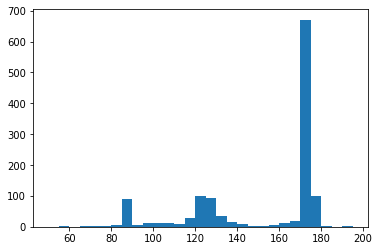

In [19]:
plt.hist(liked_songs_df[['tempo']], bins=np.arange(50,200, 5))

(array([276., 105.,  28.,  75., 110., 109., 149.,  78.,  85., 241.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

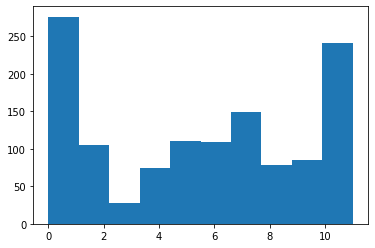

In [20]:
plt.hist(liked_songs_df[['key']])